In [6]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(
    style="whitegrid",
    font_scale=1.5,
    palette="bright",
    rc={"lines.linewidth": 2}
)

plt.rcParams.update({
    'figure.dpi': 300,
    'axes.labelsize': 30.0,
    'axes.titlesize': 30.0,
    'axes.labelweight': 'normal',
    'axes.linewidth': 1.25,
    'legend.fontsize': 25,
    'legend.title_fontsize': 18.0,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'lines.linewidth': 2.0,
    'lines.markersize': 6.0,
    'grid.color': '.8',
    'grid.linestyle': '-',
    'grid.linewidth': 1.0,
})


dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)
if dir1 not in sys.path: sys.path.append(dir0)

from src.utils import ExperimentUtils

# print(ExperimentUtils.get_plt_params())
plt.style.use(ExperimentUtils.get_plt_params())


/var/folders/jk/p6ztnrh56hd0d6495g9sg_nh0000gn/T/ipykernel_7504/3115920222.py:40: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring this parameter.
  plt.style.use(ExperimentUtils.get_plt_params())
/var/folders/jk/p6ztnrh56hd0d6495g9sg_nh0000gn/T/ipykernel_7504/3115920222.py:40: UserWarning: Style includes a parameter, 'backend_fallback', that is not related to style.  Ignoring this parameter.
  plt.style.use(ExperimentUtils.get_plt_params())
/var/folders/jk/p6ztnrh56hd0d6495g9sg_nh0000gn/T/ipykernel_7504/3115920222.py:40: UserWarning: Style includes a parameter, 'date.epoch', that is not related to style.  Ignoring this parameter.
  plt.style.use(ExperimentUtils.get_plt_params())
/var/folders/jk/p6ztnrh56hd0d6495g9sg_nh0000gn/T/ipykernel_7504/3115920222.py:40: UserWarning: Style includes a parameter, 'docstring.hardcopy', that is not related to style.  Ignoring this parameter.
  plt.style.use(ExperimentUtils.get_plt_params())
/var/folders/jk/p

In [7]:
# helper methods
def csv_file_to_df(dir, filename):
    suite = ExperimentUtils(path=str(dir+filename))
    return suite.df

def get_strategy(name):
    if 'gatv2' in name:
        return 'GATv2'
    elif 'gat' in name:
        return 'GAT'
    else:
        raise ValueError('Unknown strategy ' + file_make_up)

def get_heads(name_series):
    # Extract digits from strings like "attention heads = 1"
    return name_series.str.extract(r'(\d+)').astype(int)

In [8]:
csv_dir = 'saved_experiments/'

list_of_filenames_to_process = [
    '2_gat_num_heads_encode_true.csv',
    '2_gat_num_heads_encode_false.csv',
    '2_gatv2_num_heads_encode_true.csv',
    '2_gatv2_num_heads_encode_false.csv',
]

df = pd.DataFrame()

for file in list_of_filenames_to_process:
    file_make_up = file.split('.')[0]

    df_file = csv_file_to_df(csv_dir, file)
    df_file['strategy'] = get_strategy(file_make_up)
    df_file['name'] = get_heads(df_file['name'])
    kpi_df = pd.json_normalize(df_file['kpi']) # Normalize the dictionaries into separate columns
    df_file = pd.concat([df_file.drop(columns=['kpi']), kpi_df], axis=1)
    df = pd.concat([df, df_file], ignore_index=True)

#
df = df.rename(columns={'name': 'attention_heads'})
# df["embedding_number"] = df["embedding_number"].str.extract(r"(\d+)", expand=False).astype(int)


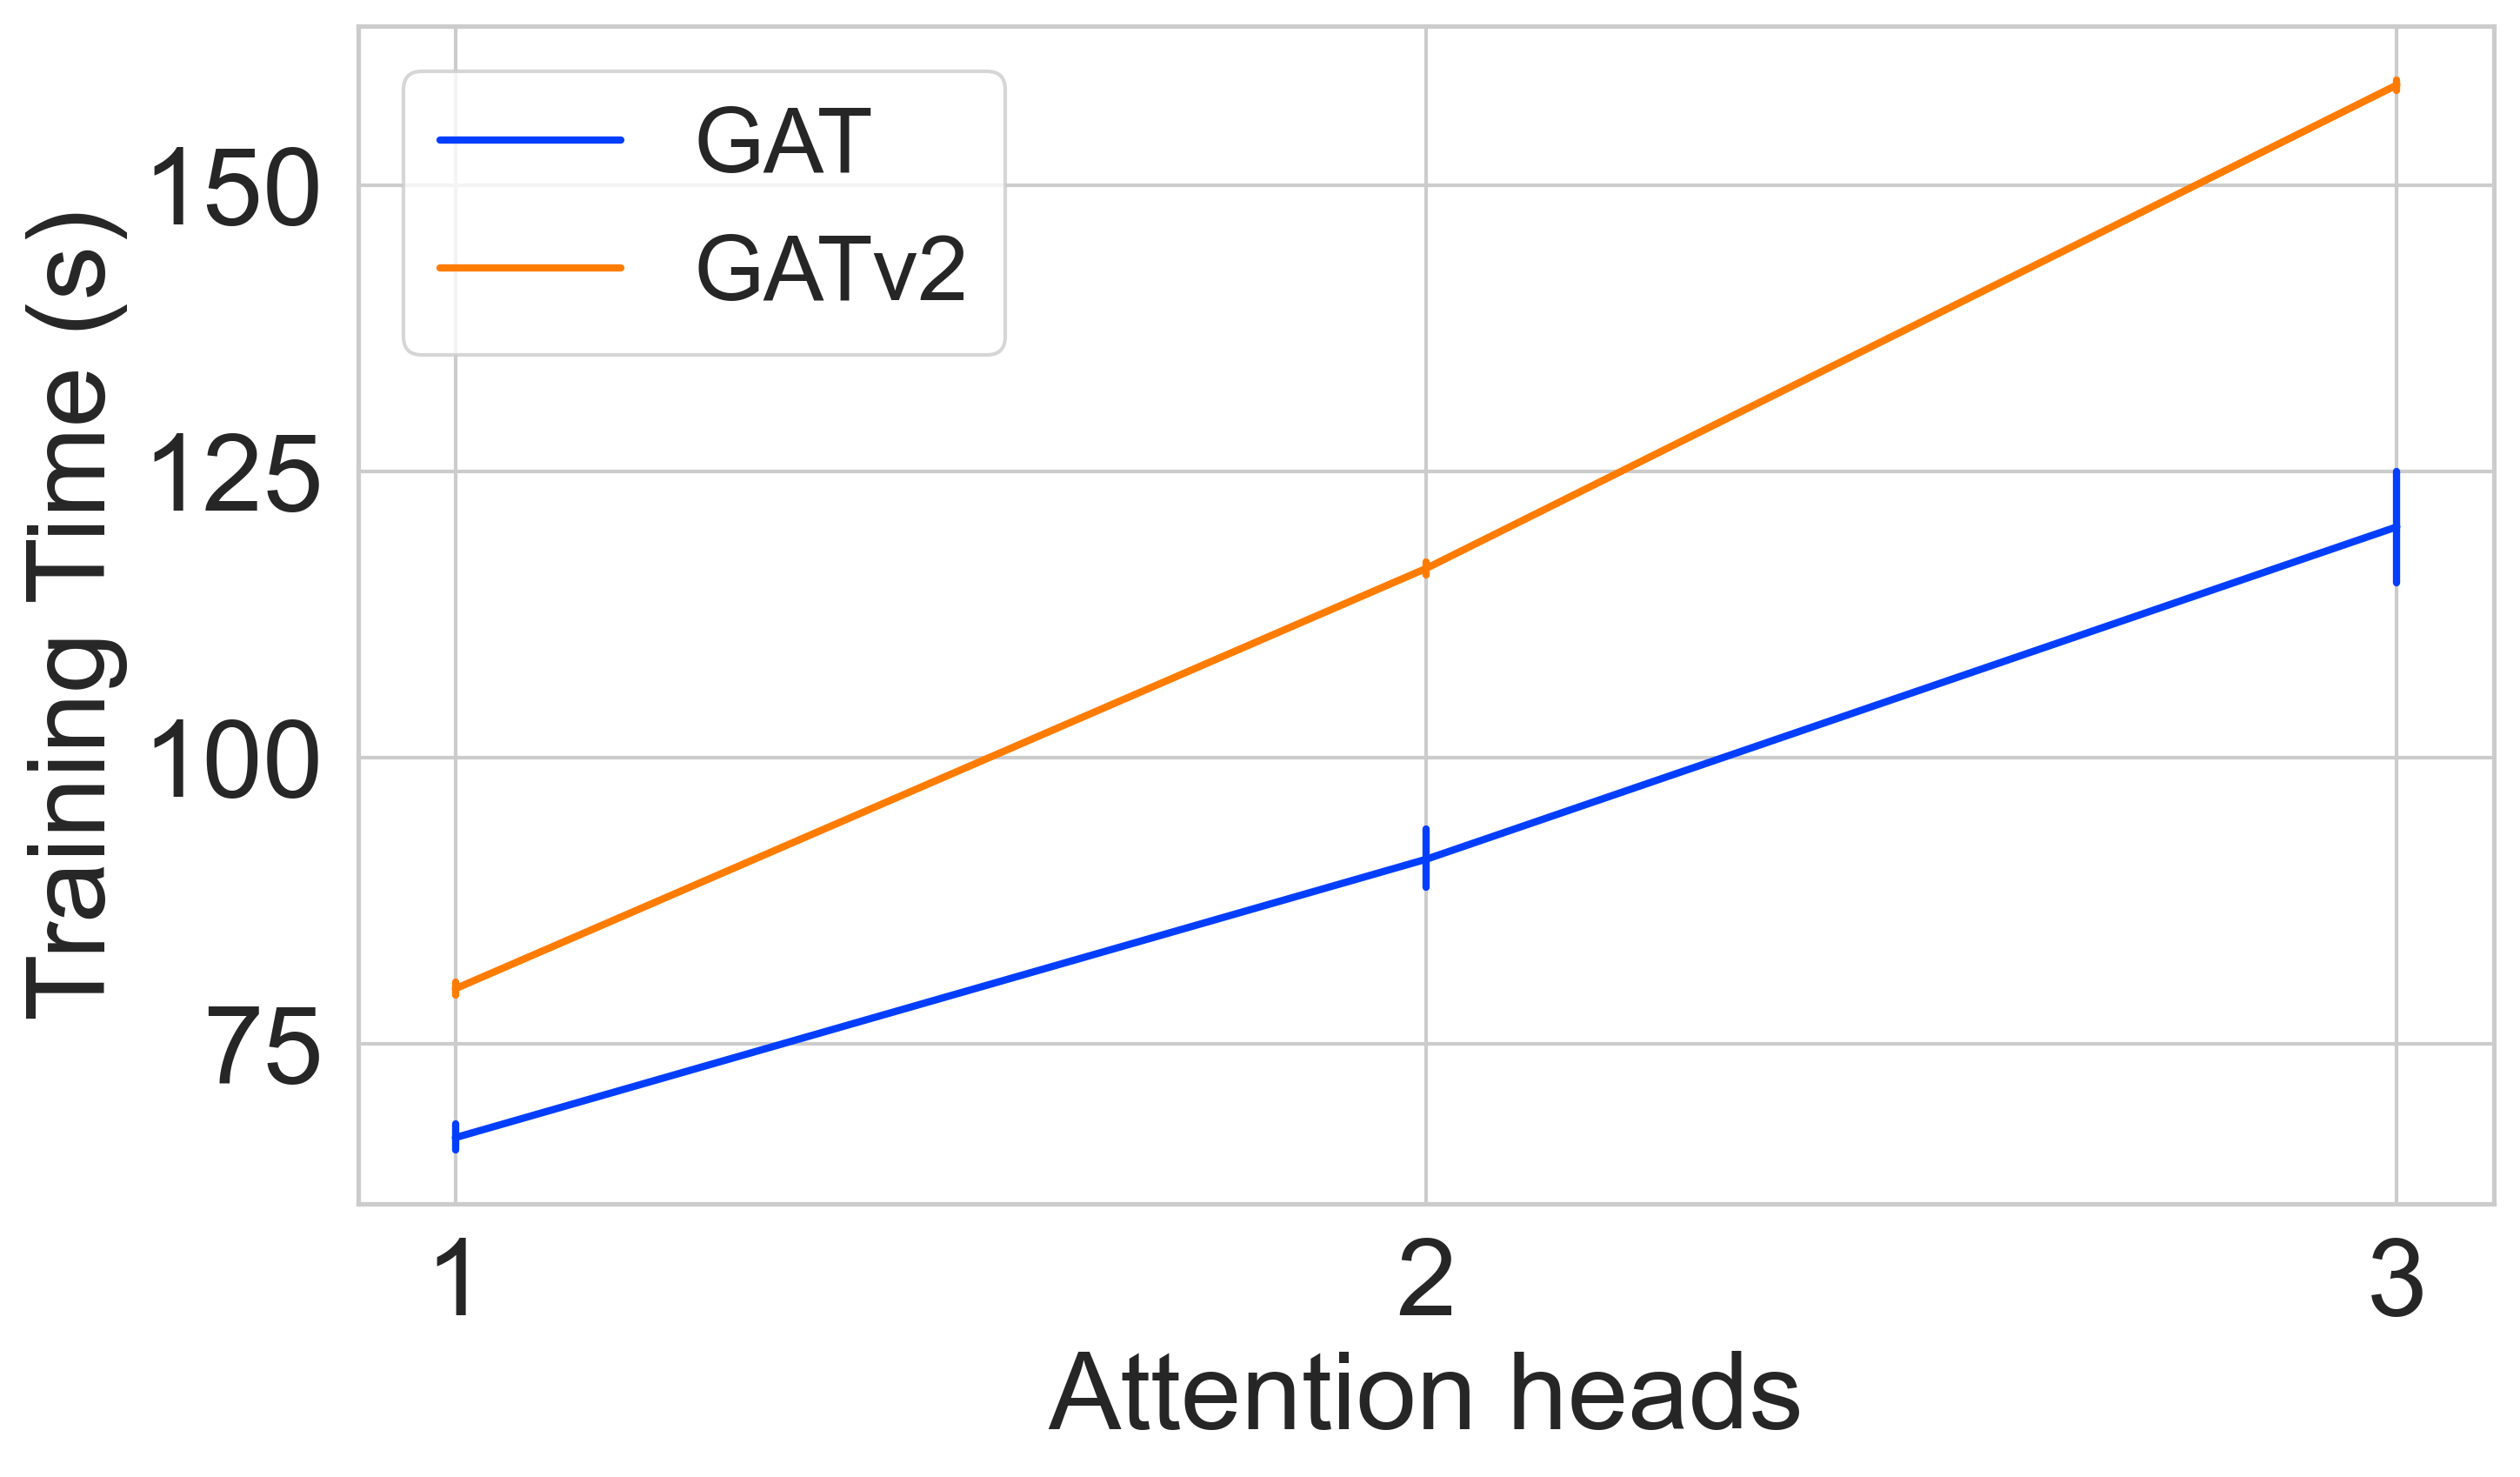

In [9]:
# Assuming your DataFrame is named df
# Group by strategy, depth, and embedding number and calculate mean and std
summary = df.groupby(['strategy', 'attention_heads'])['training_time'].agg(['mean', 'std']).reset_index()

# Rename columns for convenience
summary.columns = ['strategy', 'attention_heads', 'mean_training_time', 'std_training_time']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x='attention_heads',
    y='training_time',
    hue='strategy',
    markers=True,
    dashes=True,
    err_style='bars',
    linewidth=2,
    estimator='mean',
    errorbar=('ci', 90)
)
custom_ticks = df['attention_heads'].unique()
plt.xticks(custom_ticks)
plt.xlabel('Attention heads')
plt.ylabel('Training Time (s)')
# plt.ylim(bottom=0)
plt.grid(True)
plt.legend(title=None)

plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


In [10]:
summary

,strategy,attention_heads,mean_training_time,std_training_time
0,GAT,1,66.815821,3.109339
1,GAT,2,91.133886,7.251861
2,GAT,3,120.176569,12.891253
3,GATv2,1,79.826775,1.624971
4,GATv2,2,116.540575,1.530986
5,GATv2,3,158.775243,1.343326
